In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Add these at the top of script
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [7]:
# 1. Load the dataset (adjust the path if necessary)
file_path="HDR23-24_Statistical_Annex_HDI_Table.xlsx"
df = pd.read_excel(file_path)

In [8]:
# 2. Inspect the dataset to understand its structure
# print(df.head())
# print(df.columns)

df_clean = pd.read_excel(file_path, skiprows=5)

df_clean.head(), df_clean.columns

(   HDI rank                      Country  Value  Unnamed: 3   (years)  \
 0       NaN                          NaN   2022         NaN  2022.000   
 1       NaN  VERY HIGH HUMAN DEVELOPMENT    NaN         NaN       NaN   
 2       1.0                  Switzerland  0.967         NaN    84.255   
 3       2.0                       Norway  0.966         NaN    83.393   
 4       3.0                      Iceland  0.959         NaN    82.815   
 
   Unnamed: 5  (years).1 Unnamed: 7  (years).2 Unnamed: 9 (2017 PPP $)  \
 0        NaN       2022          a       2022          a         2022   
 1        NaN        NaN        NaN        NaN        NaN          NaN   
 2        NaN  16.583731        NaN  13.904066          c  69432.78669   
 3        NaN   18.63846          d  13.062343          c  69189.76165   
 4        NaN   19.10673          d   13.76717        NaN  54688.37921   
 
   Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  
 0         NaN        2022           b        2021  
 1

In [10]:
# Select and rename key columns
df_selected = df_clean[['Country', 'Value', '(years)', '(years).1', '(years).2', '(2017 PPP $)']].copy()
df_selected.columns = ['Country', 'HDI', 'Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']

# Drop rows with missing values in any of the selected columns
df_selected.dropna(inplace=True)

# Convert HDI to numeric, coercing errors to NaN
df_selected['HDI'] = pd.to_numeric(df_selected['HDI'], errors='coerce')

# Drop rows with NaN values after conversion
df_selected.dropna(subset=['HDI'], inplace=True)

# Create a new column for vulnerability level based on HDI
def classify_vulnerability(hdi):
    if hdi < 0.55:
        return 'High'
    elif hdi < 0.70:
        return 'Medium'
    else:
        return 'Low'

df_selected['Vulnerability_Level'] = df_selected['HDI'].apply(classify_vulnerability)

# Preview the cleaned dataset
df_selected.head()


,Country,HDI,Life_Expectancy,Expected_Schooling,Mean_Schooling,GNI_per_Capita,Vulnerability_Level
2,Switzerland,0.967,84.255,16.583731,13.904066,69432.78669,Low
3,Norway,0.966,83.393,18.63846,13.062343,69189.76165,Low
4,Iceland,0.959,82.815,19.10673,13.76717,54688.37921,Low
5,"Hong Kong, China (SAR)",0.956,84.315,17.84959,12.34777,62485.50516,Low
6,Denmark,0.952,81.882,18.774031,12.96049,62018.95694,Low


In [11]:
df_selected.tail()

,Country,HDI,Life_Expectancy,Expected_Schooling,Mean_Schooling,GNI_per_Capita,Vulnerability_Level
216,Sub-Saharan Africa,0.549,60.639700,10.318008,5.975957,3666.202926,High
218,Least developed countries,0.542,64.922579,10.07708,5.04798,3005.704157,High
219,Small island developing states,0.730,71.577062,12.585566,8.62485,16379.351549,Low
221,Organisation for Economic Co-operation and Dev...,0.906,80.129907,16.59111,12.203173,46318.344964,Low
223,World,0.739,72.004070,12.989766,8.661598,17254.434037,Low


In [16]:
# Convert relevant columns to numeric, forcing errors to NaN
cols_to_convert = ['HDI', 'Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']
df_selected[cols_to_convert] = df_selected[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN after conversion
df_selected.dropna(inplace=True)

# Apply vulnerability classification again
df_selected['Vulnerability_Level'] = df_selected['HDI'].apply(classify_vulnerability)

# Preview the cleaned and labeled dataset
df_selected.tail()


,Country,HDI,Life_Expectancy,Expected_Schooling,Mean_Schooling,GNI_per_Capita,Vulnerability_Level
216,Sub-Saharan Africa,0.549,60.639700,10.318008,5.975957,3666.202926,High
218,Least developed countries,0.542,64.922579,10.077080,5.047980,3005.704157,High
219,Small island developing states,0.730,71.577062,12.585566,8.624850,16379.351549,Low
221,Organisation for Economic Co-operation and Dev...,0.906,80.129907,16.591110,12.203173,46318.344964,Low
223,World,0.739,72.004070,12.989766,8.661598,17254.434037,Low


In [17]:
# Set visual style
sns.set(style="whitegrid")


In [18]:
# List of features to visualize
features = ['HDI', 'Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']

In [19]:
# Plot histograms and boxplots
for feature in features:
    plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Distribution of GNI_per_Capita')

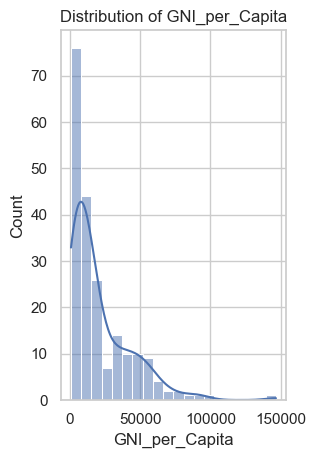

In [21]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_selected[feature], kde=True, bins=20)
plt.title(f'Distribution of {feature}')

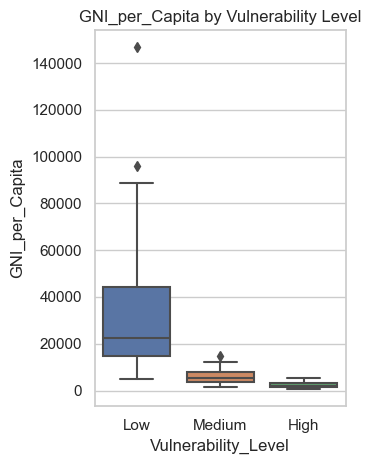

In [22]:
 #Boxplot by Vulnerability Level
plt.subplot(1, 2, 2)
sns.boxplot(data=df_selected, x='Vulnerability_Level', y=feature)
plt.title(f'{feature} by Vulnerability Level')

plt.tight_layout()
plt.show()

In [23]:
# Load and preprocess (same as before)
df = pd.read_excel("HDR23-24_Statistical_Annex_HDI_Table.xlsx", skiprows=5)
df = df[['Country', 'Value', '(years)', '(years).1', '(years).2', '(2017 PPP $)']]
df.columns = ['Country', 'HDI', 'Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']
df[['HDI', 'Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']] = \
    df[['HDI', 'Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

def classify_vulnerability(hdi):
    if hdi < 0.55:
        return 'High'
    elif hdi < 0.70:
        return 'Medium'
    else:
        return 'Low'

df['Vulnerability_Level'] = df['HDI'].apply(classify_vulnerability)

In [24]:
# Encode target
label_encoder = LabelEncoder()
df['Vulnerability_Label'] = label_encoder.fit_transform(df['Vulnerability_Level'])

# Feature matrix and target
X = df[['Life_Expectancy', 'Expected_Schooling', 'Mean_Schooling', 'GNI_per_Capita']]
y = df['Vulnerability_Label']


In [25]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [29]:
# Train and evaluate
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Logistic Regression
              precision    recall  f1-score   support

        High       1.00      0.80      0.89        10
         Low       0.91      1.00      0.95        21
      Medium       0.82      0.82      0.82        11

    accuracy                           0.90        42
   macro avg       0.91      0.87      0.89        42
weighted avg       0.91      0.90      0.90        42


Decision Tree
              precision    recall  f1-score   support

        High       0.70      0.70      0.70        10
         Low       0.91      0.95      0.93        21
      Medium       0.60      0.55      0.57        11

    accuracy                           0.79        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.78      0.79      0.78        42


Random Forest
              precision    recall  f1-score   support

        High       1.00      0.80      0.89        10
         Low       0.91      0.95      0.93        21
      Medium       0.75 

C:\Users\UNIVERSAL\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


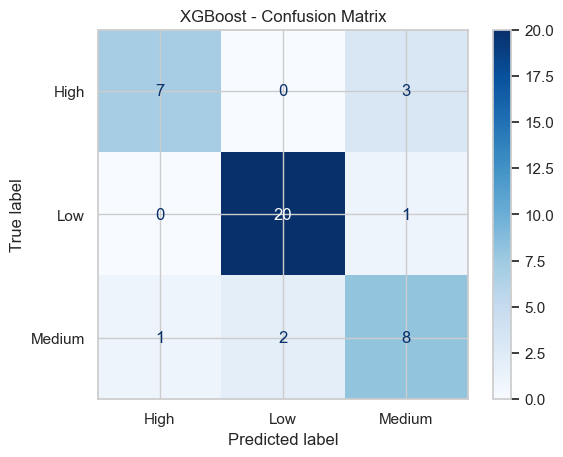

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title(f"{name} - Confusion Matrix")
plt.show()

In [35]:

# Evaluate each model's accuracy
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Detailed classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Logistic Regression
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.80      0.89        10
         Low       0.91      1.00      0.95        21
      Medium       0.82      0.82      0.82        11

    accuracy                           0.90        42
   macro avg       0.91      0.87      0.89        42
weighted avg       0.91      0.90      0.90        42


Decision Tree
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.80      0.76        10
         Low       0.91      0.95      0.93        21
      Medium       0.67      0.55      0.60        11

    accuracy                           0.81        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.80      0.81      0.80        42


Random Forest
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

        High      

C:\Users\UNIVERSAL\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
